# CountVectorizer Models
In order to train a model on our titles, we need to represent our text numerically. In this notebook, we explore the simplest way to do this: with a "Bag of Words" representation, and then fitting a variety of models to the ensulting features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

In [2]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB
# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer,\
                                            TfidfVectorizer

In [3]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

In [4]:
def save_obj(obj, filename):
    with open(filename + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(filename):
    with open(filename + '.pkl', 'rb') as f:
        return pickle.load(f)

In [5]:
DIR = "C:\\Users\\AzNsAnTaGiN\\DSI\\Projects\\project_3\\data\\"
FILE1 = "theonion"
FILE2 = "nottheonion"
FILE3 = "onionheadlines"

# Data Import
We previously cleaned our data, so lets get it:

In [6]:
X_theonion = load_obj(DIR+FILE1+"_df_clean")
X_nottheonion = load_obj(DIR+FILE2+"_df_clean")

In [7]:
X_theonion["is_onion"] = 1
X_nottheonion["is_onion"] = -1

In [8]:
len(X_theonion)

8588

In [9]:
len(X_nottheonion)

419204

We have about 50x as much data from `not_theonion`.

## Peeking at the data

In [10]:
N=4000
X_theonion_shuffled = X_theonion.sample(len(X_theonion))
theonion_sample = X_theonion_shuffled.head(N)
theonion_holdout = X_theonion_shuffled.tail(len(X_theonion_shuffled) - N)

X_nottheonion_shuffled = X_nottheonion.sample(len(X_nottheonion))
nottheonion_sample = X_nottheonion_shuffled.head(N)
nottheonion_holdout = X_nottheonion_shuffled.tail(len(X_nottheonion_shuffled)-N)
X_sample = pd.concat([theonion_sample, nottheonion_sample])
X = pd.concat([X_theonion, X_nottheonion])

In [11]:
cvec = CountVectorizer(ngram_range=(1,1))
cvec.fit(theonion_sample["title"])
cvec.transform(theonion_sample["title"])
cvec_df = pd.DataFrame(cvec.transform(theonion_sample["title"]).toarray(),
                      columns=cvec.get_feature_names())

In [12]:
cvec2 = CountVectorizer(ngram_range=(1,1))
cvec2.fit(nottheonion_sample["title"])
cvec2.transform(nottheonion_sample["title"])
cvec2_df = pd.DataFrame(cvec2.transform(nottheonion_sample["title"]).toarray(),
                      columns=cvec2.get_feature_names())

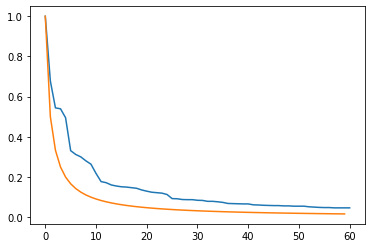

In [13]:
zipf = cvec2_df.sum().sort_values(ascending=False).values
zipf = zipf / zipf[0]
plt.plot(zipf[:61]);
plt.plot([1/x for x in range(1, 61)]);

Words in languages are Zipf-distributed. Roughly speaking, the relative frequency of any word is inversely proportional to its rank. That is to say, the 2nd most common word appears half as often, the 3rd appears about a third as often, etc.

We can look at the tail end of this to see some fun unicode that we didn't successfully clean out!

In [14]:
with pd.option_context("display.max_colwidth", -1, "display.max_rows", None):
    display(cvec2_df.sum().tail(80))

yamaguchi      2  
yankees        1  
yanking        1  
yanks          1  
yanny          1  
yard           5  
yarn           1  
yarram         1  
yay            1  
year           105
yearbooks      1  
years          35 
yeh            1  
yelling        2  
yellow         2  
yellowstone    1  
yells          1  
yelp           1  
yes            5  
yeshiva        1  
yeti           1  
ying           1  
yo             2  
yob            1  
yoda           1  
yoga           4  
yoke           2  
yolo           1  
yom            1  
york           20 
yorke          1  
yorker         1  
yorkers        2  
you            75 
youd           1  
young          23 
youngsters     1  
your           44 
yourself       1  
yourselves     1  
youth          3  
youtube        4  
youtuber       1  
yowza          1  
yu             1  
yup            1  
yıkama         1  
z4             1  
zac            2  
zara           1  
zavala         1  
zayn           1  
ze          

## Words that are unique to `/r/theonion`

In [15]:
N = 250

In [16]:
theonion_top_words = cvec_df.sum().sort_values(ascending=False).index[:N]

In [17]:
nottheonion_top_words = cvec2_df.sum().sort_values(ascending=False).index[:N]

In [18]:
[(cvec_df[i].sum(),i) for i in theonion_top_words if i not in nottheonion_top_words]

[(89, 'week'),
 (74, 'know'),
 (74, 'nation'),
 (72, 'americans'),
 (64, 'going'),
 (64, 'still'),
 (61, 'area'),
 (61, 'most'),
 (59, 'things'),
 (51, 'nations'),
 (51, '2018'),
 (49, 'every'),
 (49, 'god'),
 (47, 'never'),
 (47, 'next'),
 (47, 'self'),
 (46, 'last'),
 (46, 'work'),
 (44, 'announces'),
 (44, 'getting'),
 (43, 'way'),
 (42, 'where'),
 (41, 'little'),
 (41, 'campaign'),
 (40, 'really'),
 (40, 'cant'),
 (39, 'right'),
 (39, 'scientists'),
 (38, 'job'),
 (38, 'any'),
 (38, 'around'),
 (36, 'tips'),
 (36, 'some'),
 (35, 'unveils'),
 (35, 'do'),
 (35, 'away'),
 (35, 'clinton'),
 (35, 'doesnt'),
 (35, 'john'),
 (34, 'or'),
 (33, 'hes'),
 (33, 'company'),
 (33, 'big'),
 (33, 'fucking'),
 (33, 'reveals'),
 (33, 'human'),
 (32, 'already'),
 (32, 'asks'),
 (32, 'finally'),
 (32, 'friends'),
 (31, 'social'),
 (31, 'why'),
 (31, 'entire'),
 (31, 'hours'),
 (30, 'releases'),
 (30, 'good'),
 (30, 'gop'),
 (30, 'plan'),
 (30, 'recalls'),
 (30, 'shit'),
 (30, 'other'),
 (30, 'under'),

## Words that are unique to `/r/nottheonion`

In [19]:
[(cvec2_df[i].sum(),i) for i in nottheonion_top_words if i not in theonion_top_words]

[(195, 'police'),
 (111, 'sex'),
 (98, 'arrested'),
 (81, 'because'),
 (77, 'us'),
 (54, 'florida'),
 (53, 'claims'),
 (53, 'car'),
 (52, 'found'),
 (51, 'dog'),
 (47, 'charged'),
 (45, 'black'),
 (45, 'baby'),
 (44, 'calls'),
 (43, 'fire'),
 (43, 'student'),
 (43, 'accused'),
 (42, 'donald'),
 (42, 'students'),
 (41, 'texas'),
 (40, 'shooting'),
 (39, 'boy'),
 (39, 'gay'),
 (38, 'drug'),
 (37, 'gun'),
 (37, 'dies'),
 (36, 'accidentally'),
 (36, 'cops'),
 (35, 'prison'),
 (35, 'teen'),
 (35, 'north'),
 (35, 'two'),
 (34, 'free'),
 (34, 'former'),
 (34, 'name'),
 (34, 'men'),
 (33, 'girl'),
 (33, 'sues'),
 (33, 'allegedly'),
 (32, 'kids'),
 (32, 'kill'),
 (32, 'university'),
 (32, 'son'),
 (31, 'russian'),
 (31, 'wins'),
 (31, 'driving'),
 (31, 'officer'),
 (30, 'town'),
 (30, 'using'),
 (30, 'penis'),
 (30, 'use'),
 (30, 'killed'),
 (30, 'wants'),
 (29, 'anti'),
 (29, 'chicken'),
 (29, 'shot'),
 (29, 'college'),
 (29, 'caught'),
 (29, 'live'),
 (28, 'murder'),
 (28, 'money'),
 (28, 'us

## Words that are common to both

In [20]:
[(cvec2_df[i].sum(),i) for i in theonion_top_words if i in nottheonion_top_words]

[(1325, 'to'),
 (721, 'of'),
 (898, 'in'),
 (715, 'for'),
 (656, 'the'),
 (414, 'on'),
 (398, 'with'),
 (439, 'man'),
 (150, 'new'),
 (235, 'by'),
 (350, 'after'),
 (201, 'trump'),
 (213, 'from'),
 (372, 'and'),
 (228, 'at'),
 (78, 'about'),
 (165, 'he'),
 (116, 'out'),
 (117, 'be'),
 (159, 'as'),
 (122, 'that'),
 (30, 'just'),
 (162, 'it'),
 (102, 'up'),
 (40, 'report'),
 (91, 'into'),
 (180, 'who'),
 (112, 'not'),
 (42, 'how'),
 (89, 'has'),
 (52, 'this'),
 (47, 'all'),
 (73, 'have'),
 (75, 'you'),
 (38, 'time'),
 (199, 'woman'),
 (105, 'year'),
 (48, 'day'),
 (28, 'study'),
 (73, 'will'),
 (172, 'over'),
 (67, 'can'),
 (75, 'him'),
 (206, 'his'),
 (62, 'they'),
 (289, 'is'),
 (64, 'more'),
 (25, 'only'),
 (43, 'get'),
 (35, 'if'),
 (38, 'first'),
 (50, 'now'),
 (35, 'back'),
 (62, 'off'),
 (77, 'no'),
 (32, 'what'),
 (88, 'old'),
 (25, 'finds'),
 (44, 'your'),
 (39, 'one'),
 (82, 'people'),
 (29, 'before'),
 (46, 'like'),
 (36, 'could'),
 (79, 'white'),
 (62, 'house'),
 (34, 'family

# Bag of Words + Logistic Regression

## No custom tokenizing, no lemmatizing, no stop words. Let's see what our baseline looks like!

We'll start small by sampling 4000 titles from both subreddits

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_sample["title"], X_sample["is_onion"])
pipe = Pipeline([
    ("cvec", CountVectorizer()),
    ("logreg", LogisticRegressionCV(Cs=np.logspace(-2,2,100), max_iter=1000))])
     
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train)

0.9835

In [22]:
pipe.score(X_test, y_test)

0.7995

In [23]:
# pipe[1].scores_[1]

In [24]:
pipe[1].C_

array([0.95454846])

Now we'll score our model on the holdout data we didn't end up sampling:

In [25]:
pipe.score(theonion_holdout["title"], theonion_holdout["is_onion"])

0.7909764603312991

In [26]:
pipe.score(nottheonion_holdout["title"], nottheonion_holdout["is_onion"])

0.8054883864317299

## Hyperparameter searching ft. ngrams, finite features, stop words

Can we improve this with a hyperparameter search? We will consider using stop words, ngrams, a finite number of features, and a few other hyperparameters.

In [27]:
pipe = Pipeline([
    ("cvec", CountVectorizer(strip_accents="unicode")),
#     ("norm", Normalizer()),
    ("logreg", LogisticRegression(max_iter=1000))
])

rand_search = RandomizedSearchCV(pipe,
                                 n_jobs=-2,
                                 n_iter=50,
                                 param_distributions={
    "logreg__C": np.logspace(-1,1,100),
    "cvec__max_df": [.99, 1],
    "cvec__min_df": [0, 0.01],
    "cvec__stop_words": [None, [i for i in theonion_top_words if i in nottheonion_top_words]],
    "cvec__ngram_range": [(1,1), (1,2)],
    "cvec__max_features": [None, 10, 50, 100, 250, 500, 1000, 2000, 5000, 10000, 20000, 50000]
})
rand_search.fit(X_train, y_train);

In [28]:
rand_search.best_estimator_

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.99,
                                 max_features=10000, min_df=0,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents='unicode',
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('logreg',
                 LogisticRegression(C=0.6734150657750824, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=1000, multi_class='auto',
             

In [29]:
rand_search.score(X_train, y_train)

0.9685

In [30]:
rand_search.score(X_test, y_test)

0.8005

In [31]:
rand_search.score(theonion_holdout["title"], theonion_holdout["is_onion"])

0.7931560592850916

In [32]:
rand_search.score(nottheonion_holdout["title"], nottheonion_holdout["is_onion"])

0.8050572730513194

This is a marginal improvement over our naive model, but it's worth noting that we finish training this model in half the time.

# CountVectorizer + Naive Bayes

In the following section, we apply a variety of Naive Bayes models to our CountVectorized titles.

## CVec + MultinomialNB
### Naive

In [33]:
pipe = Pipeline([
    ("cvec", CountVectorizer()),
    ("mnb", MultinomialNB())
])
     
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('mnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [34]:
display(pipe.score(X_train, y_train))
display(pipe.score(X_test, y_test))
display(pipe.score(theonion_holdout["title"], theonion_holdout["is_onion"]))
display(pipe.score(nottheonion_holdout["title"], nottheonion_holdout["is_onion"]))

0.9541666666666667

0.8115

0.8110287707061901

0.8055365555245132

### RandomizedSearchCV'd

In [35]:
pipe = Pipeline([
    ("cvec", CountVectorizer(strip_accents="unicode")),
    ("mnb", MultinomialNB())
])

rand_search = RandomizedSearchCV(pipe,
                                 n_jobs=-2,
                                 n_iter=50,
                                 param_distributions={
    "mnb__alpha": np.linspace(0,1,11),
    "cvec__max_df": [.99, 1],
    "cvec__min_df": [0, 0.01],
    "cvec__stop_words": [None, [i for i in theonion_top_words if i in nottheonion_top_words]],
    "cvec__ngram_range": [(1,1), (1,2)],
    "cvec__max_features": [None, 10, 50, 100, 250, 500, 1000, 2000, 5000, 10000, 20000, 50000]
})
rand_search.fit(X_train, y_train);

In [36]:
rand_search.best_estimator_

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.99,
                                 max_features=10000, min_df=0,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents='unicode',
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('mnb',
                 MultinomialNB(alpha=0.9, class_prior=None, fit_prior=True))],
         verbose=False)

In [37]:
display(rand_search.score(X_train, y_train))
display(rand_search.score(X_test, y_test))
display(rand_search.score(theonion_holdout["title"], theonion_holdout["is_onion"]))
display(rand_search.score(nottheonion_holdout["title"], nottheonion_holdout["is_onion"]))

0.9443333333333334

0.812

0.8053618134263295

0.8031425516131829

## CVec + ComplementNB

In [38]:
pipe = Pipeline([
    ("cvec", CountVectorizer()),
    ("cnb", ComplementNB())
])
     
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('cnb',
                 ComplementNB(alpha=1.0, class_prior=None, fit_prior=True,
                              norm=False))],
         verbose=False)

In [39]:
display(pipe.score(X_train, y_train))
display(pipe.score(X_test, y_test))
display(pipe.score(theonion_holdout["title"], theonion_holdout["is_onion"]))
display(pipe.score(nottheonion_holdout["title"], nottheonion_holdout["is_onion"]))

0.9543333333333334

0.8115

0.8103748910200523

0.8072561921368773

In [40]:
pipe = Pipeline([
    ("cvec", CountVectorizer(strip_accents="unicode")),
    ("cnb", ComplementNB())
])

rand_search = RandomizedSearchCV(pipe,
                                 n_jobs=-2,
                                 n_iter=50,
                                 param_distributions={
    "cnb__alpha": np.linspace(0,1,11),
    "cvec__max_df": [.99, 1],
    "cvec__min_df": [0, 0.01],
    "cvec__stop_words": [None, [i for i in theonion_top_words if i in nottheonion_top_words]],
    "cvec__ngram_range": [(1,1), (1,2)],
    "cvec__max_features": [None, 10, 50, 100, 250, 500, 1000, 2000, 5000, 10000, 20000, 50000]
})
rand_search.fit(X_train, y_train);

In [41]:
display(rand_search.score(X_train, y_train))
display(rand_search.score(X_test, y_test))
display(rand_search.score(theonion_holdout["title"], theonion_holdout["is_onion"]))
display(rand_search.score(nottheonion_holdout["title"], nottheonion_holdout["is_onion"]))

0.9551666666666667

0.812

0.8003487358326068

0.7988651361740253

## CVec + BernoulliNB

In [42]:
pipe = Pipeline([
    ("cvec", CountVectorizer()),
    ("bnb", BernoulliNB())
])
     
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('bnb',
                 BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                             fit_prior=True))],
         verbose=False)

In [43]:
display(pipe.score(X_train, y_train))
display(pipe.score(X_test, y_test))
display(pipe.score(theonion_holdout["title"], theonion_holdout["is_onion"]))
display(pipe.score(nottheonion_holdout["title"], nottheonion_holdout["is_onion"]))

0.9545

0.8125

0.8007846556233653

0.8159531218389033

In [44]:
pipe = Pipeline([
    ("cvec", CountVectorizer(strip_accents="unicode")),
    ("bnb", BernoulliNB())
])

rand_search = RandomizedSearchCV(pipe,
                                 n_jobs=-2,
                                 n_iter=50,
                                 param_distributions={
    "bnb__alpha": np.linspace(0,1,11),
    "cvec__max_df": [.99, 1],
    "cvec__min_df": [0, 0.01],
    "cvec__stop_words": [None, [i for i in theonion_top_words if i in nottheonion_top_words]],
    "cvec__ngram_range": [(1,1), (1,2)],
    "cvec__max_features": [None, 10, 50, 100, 250, 500, 1000, 2000, 5000, 10000, 20000, 50000]
})
rand_search.fit(X_train, y_train);

In [45]:
display(rand_search.score(X_train, y_train))
display(rand_search.score(X_test, y_test))
display(rand_search.score(theonion_holdout["title"], theonion_holdout["is_onion"]))
display(rand_search.score(nottheonion_holdout["title"], nottheonion_holdout["is_onion"]))

0.9618333333333333

0.81

0.7948997384481256

0.8105630003564512

# Conclusions

There's nothing like fitting 8 (technically a LOT more than 8) very similar models and seeing them perform virtually identically...

In all seriousness, our first model, with naive CountVectorization + a basic Logistic Regression was very performant, and in fact none of our additional models appeared to make significant differences. BernoulliNB ended up being the best, but we haven't sampled these results enough for them to be numerically stable, so it's hard to say anything. In a world where I have infinite time and computation budget, I could resample these test scores with different samples until I had confidence intervals, and then could do a hypothesis test. We'll leave this as an exercise to a hypothetical reader.

In our next notebook, we'll explore using TF-IDF instead of CountVectorizer and seeing how much our results. In the notebook after that, we'll explore using lemmatization and word embeddings with spaCy.